In [1]:
from tensorflow import keras
import tensorflow as tf
from lib.utils import model, gan, preprocess,build

# Descending MNIST Models with batch normalization

In [2]:
# We only store the training and test data without labels
(x,_), (y,_) = keras.datasets.mnist.load_data()
#resolution and number of channels
res = 28
channel = 1
# Preprocessing data with custom function
batch_size = 64
dataset = preprocess.preprocess_Data(x,y, False,res,channel,b_size=batch_size, isTanh=True)
#Essentials
img_shape = (res,res,channel)
epochs = 30
latent_dim = 100
#number of images to sample
n_images = 16
#seed matrix of random gaussian for tracking the same samples over training
s = tf.random.normal([n_images, latent_dim])
#to calculate losses
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# directories
checkpoint_dir = '../../../checkpoints/mnist_checkpoints/asc/batch'
image_dir = "../../../oDig/mnist/asc/batch"
image_freq = 10
#optimizers
d_optimizer = build.d_optimizer(0.0002)
g_optimizer = build.g_optimizer(0.0002)

2022-03-31 15:01:21.576653: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 15:01:21.603725: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 15:01:21.604081: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 15:01:21.634626: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

### Tanh Activation

In [3]:
name = 'Model_1-Tanh-MultiDrop'
model1 = model.ModelSettings(model_name= name,
                             gen_filter=5,
                             disc_filter=5,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen1 ,disc1 = model.build(model1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 3136)              316736    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 3136)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       32800     
 nspose)                                                         
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 14, 14, 32)        0         
                                                         

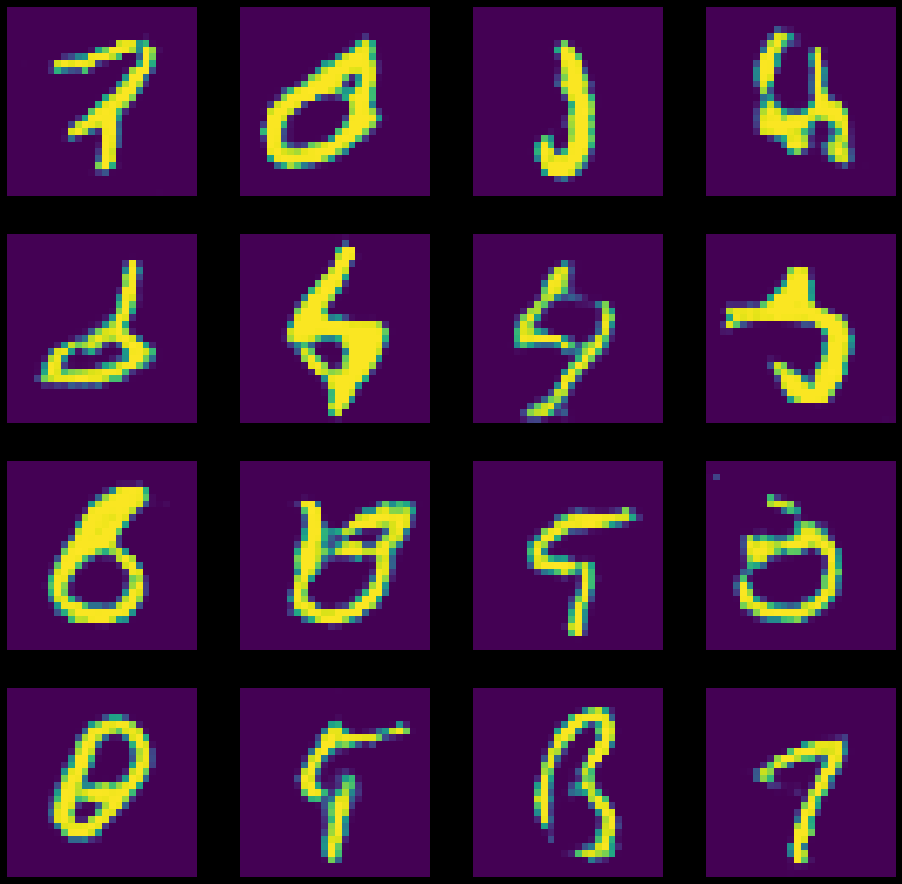

None
2188/2188 [==============================] - 14s 6ms/step - d_loss: 0.6437 - g_loss: 0.7774


In [4]:
g = gan.GAN(g = gen1, d = disc1, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [5]:
name = 'Model_2-Tanh-MultiDrop'
model2 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen2 ,disc2 = model.build(model2)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_2 (Dense)             (None, 6272)              633472    
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 6272)              0         
                                                                 
 reshape_1 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_3 (Conv2DT  (None, 14, 14, 64)       131136    
 ranspose)                                                       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                         

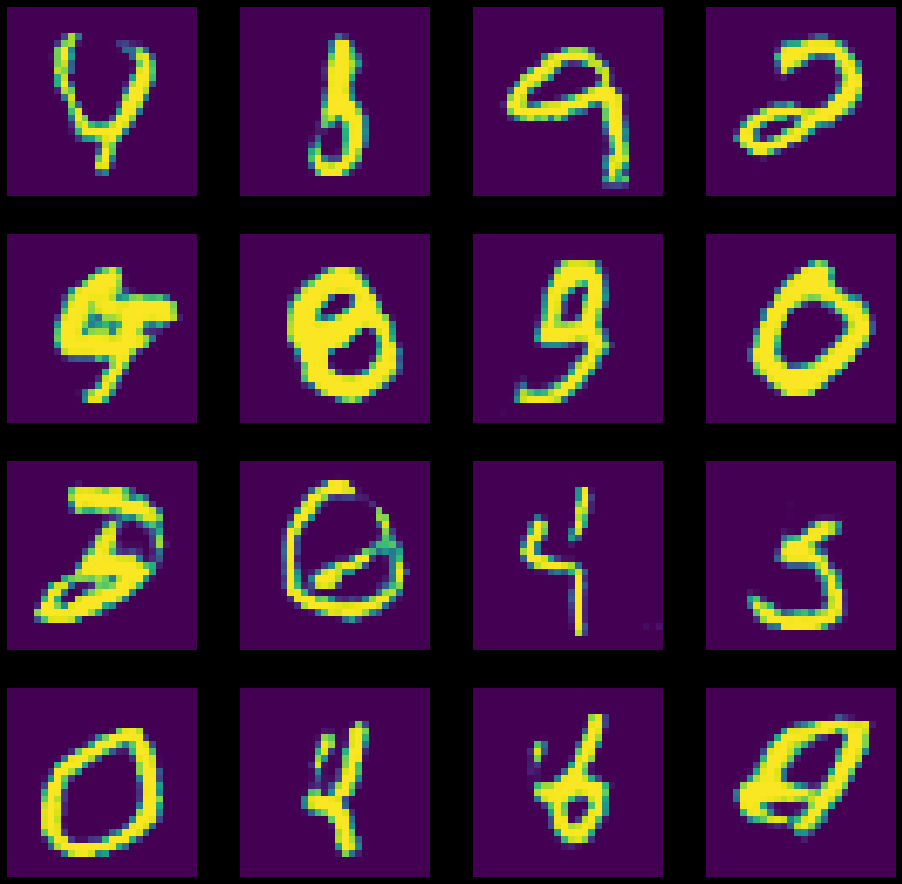

None
2188/2188 [==============================] - 15s 7ms/step - d_loss: 0.6716 - g_loss: 0.7206


In [6]:
g = gan.GAN(g = gen2, d = disc2, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [7]:
name = 'Model_3-Tanh-MultiDrop'
model3 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen3 ,disc3 = model.build(model3)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_6 (Conv2DT  (None, 14, 14, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

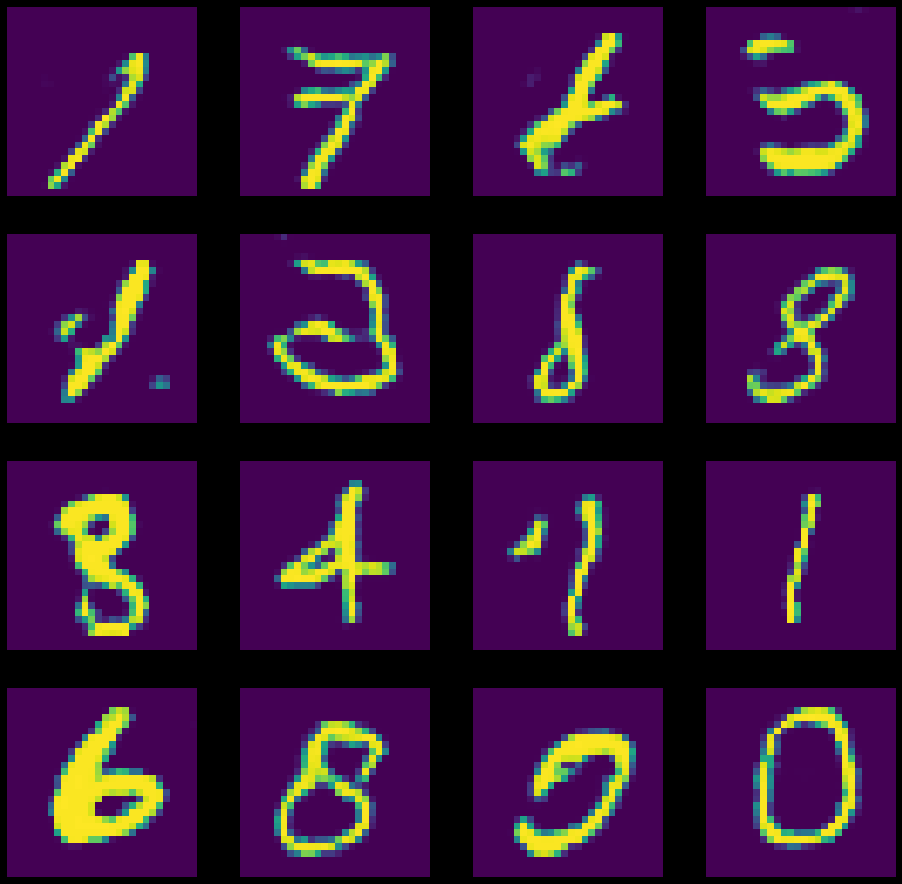

None
2188/2188 [==============================] - 28s 13ms/step - d_loss: 0.6893 - g_loss: 0.6646


In [8]:
g = gan.GAN(g = gen3, d = disc3, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [9]:
name = 'Model_4-Tanh-MultiDrop'
model4 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen4 ,disc4 = model.build(model4)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_6 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_3 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_9 (Conv2DT  (None, 14, 14, 128)      524416    
 ranspose)                                                       
                                                                 
 leaky_re_lu_15 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

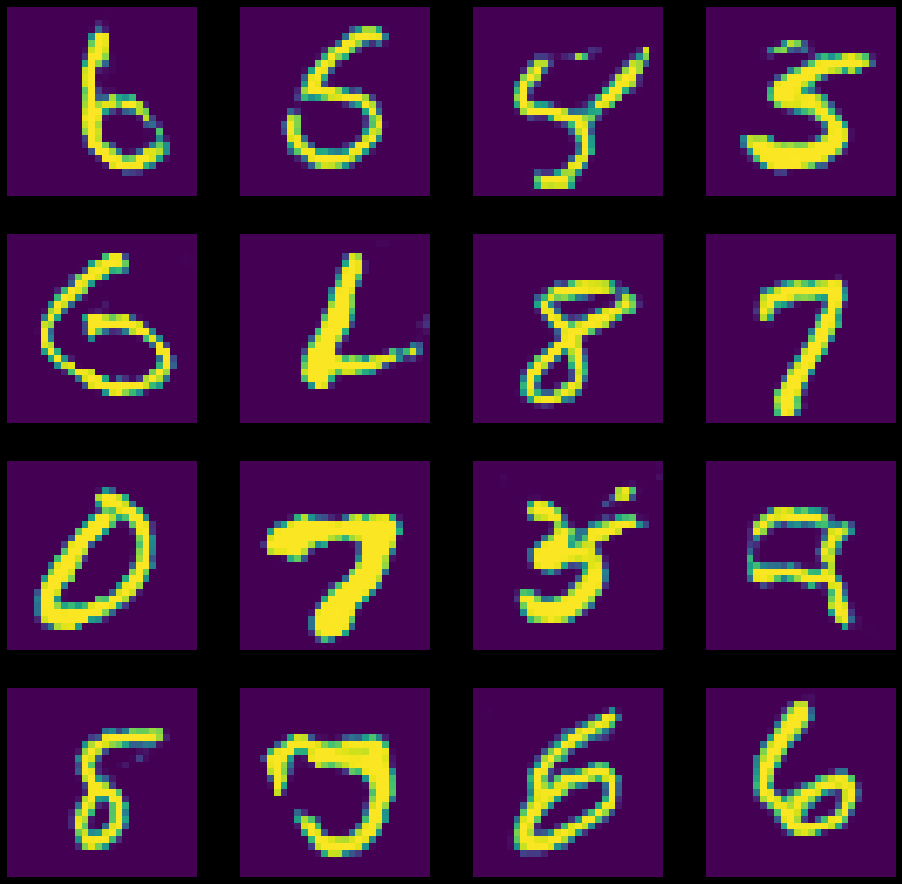

None
2188/2188 [==============================] - 29s 13ms/step - d_loss: 0.6676 - g_loss: 0.7377


In [10]:
g = gan.GAN(g = gen4, d = disc4, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [11]:
name = 'Model_5-Tanh-MultiDrop'
model5 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen5 ,disc5 = model.build(model5)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_8 (Dense)             (None, 12544)             1266944   
                                                                 
 leaky_re_lu_22 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_12 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

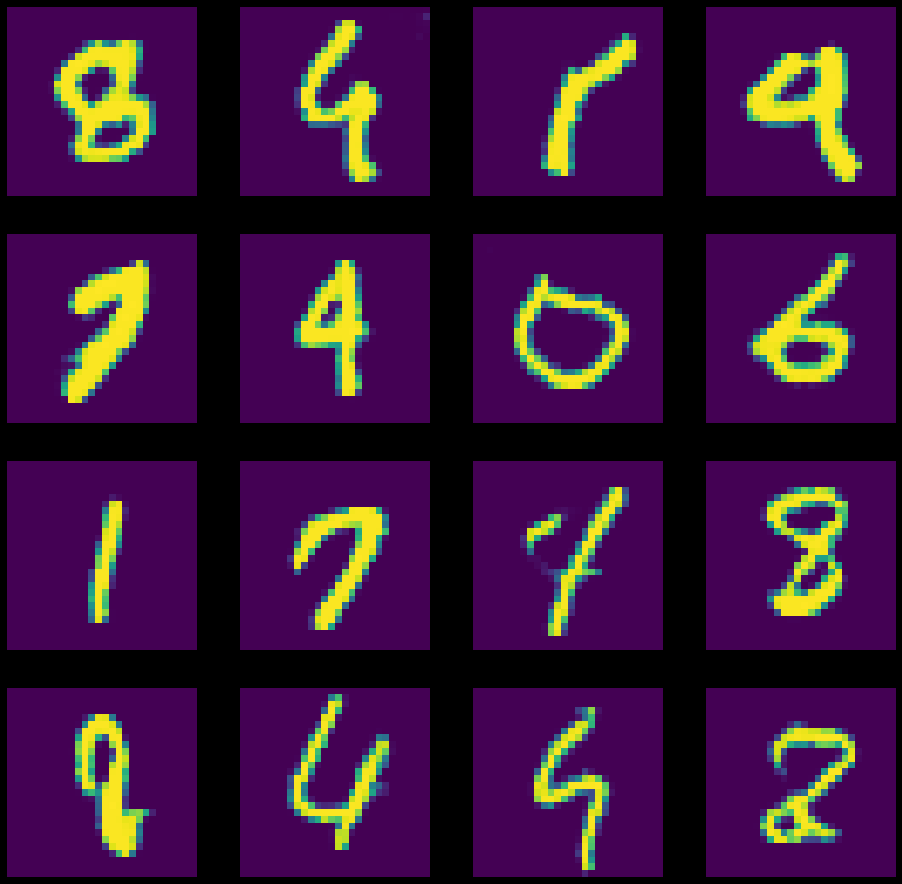

None
2188/2188 [==============================] - 39s 18ms/step - d_loss: 0.6089 - g_loss: 0.9370


In [12]:
g = gan.GAN(g = gen5, d = disc5, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [13]:
name = 'Model_6-Tanh-OneDrop'
model6 = model.ModelSettings(model_name= name,
                             gen_filter=5,
                             disc_filter=5,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen6 ,disc6 = model.build(model6)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_10 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_27 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_5 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_15 (Conv2D  (None, 14, 14, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_25 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                         

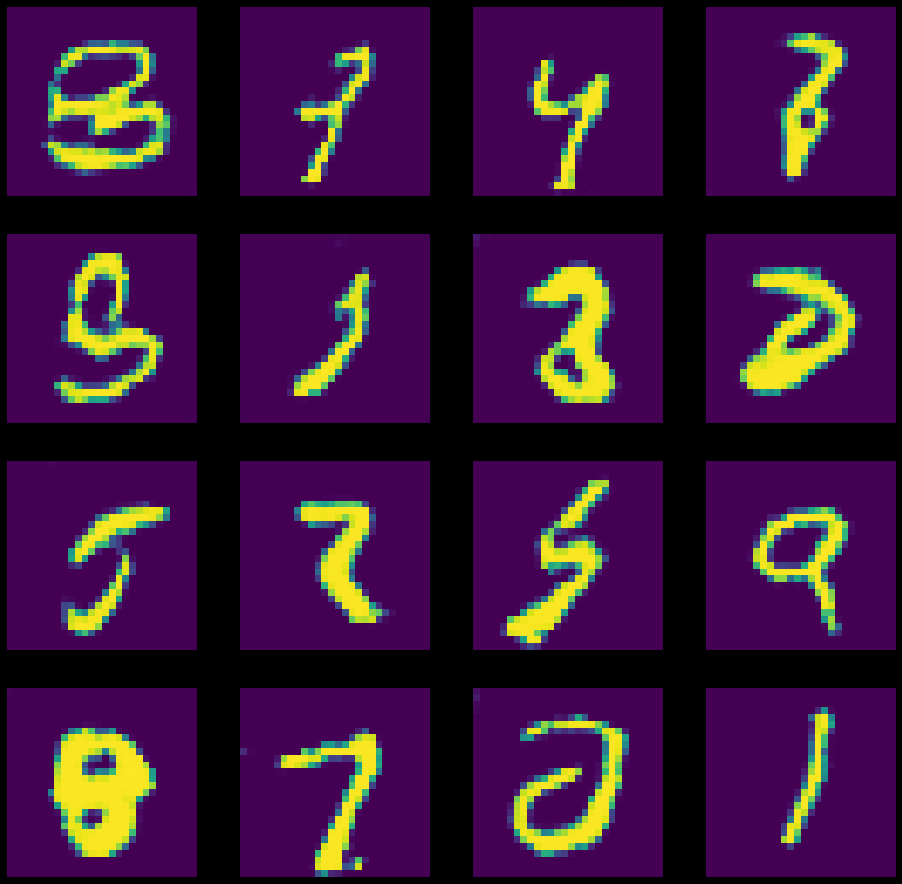

None
2188/2188 [==============================] - 14s 7ms/step - d_loss: 0.6445 - g_loss: 0.7891


In [14]:
g = gan.GAN(g = gen6, d = disc6, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [15]:
name = 'Model_7-Tanh-OneDrop'
model7 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen7 ,disc7 = model.build(model7)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_12 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_32 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_18 (Conv2D  (None, 14, 14, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_30 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

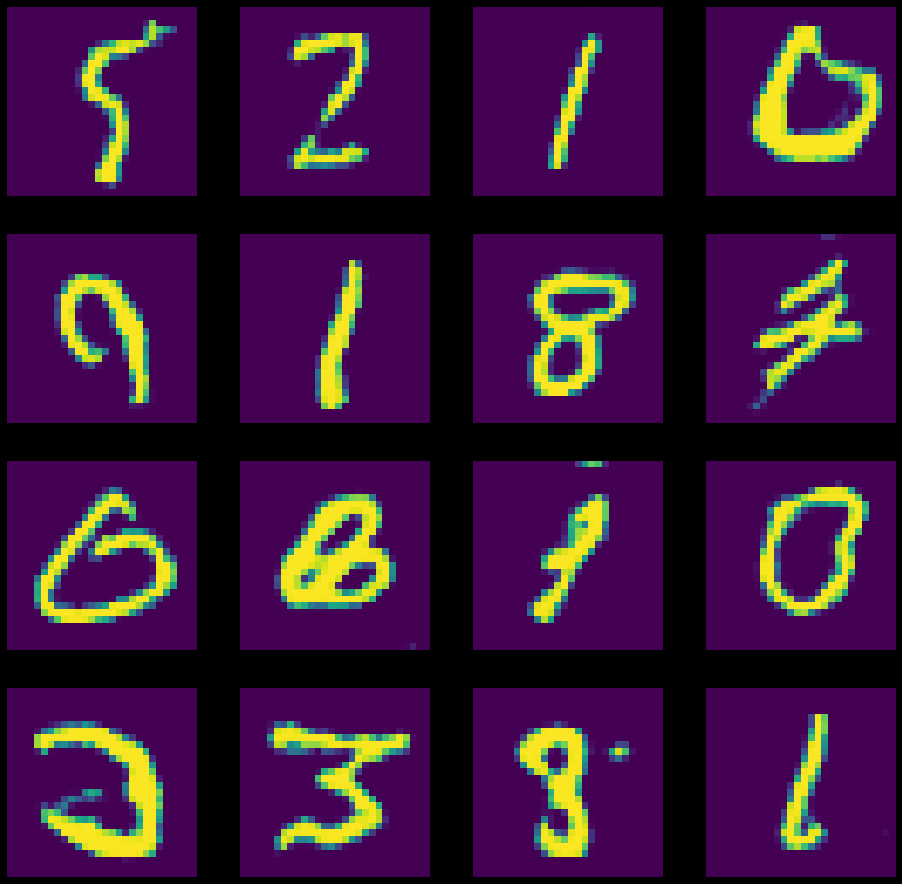

None
2188/2188 [==============================] - 17s 8ms/step - d_loss: 0.6677 - g_loss: 0.7447


In [16]:
g = gan.GAN(g = gen7, d = disc7, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [17]:
name = 'Model_8-Tanh-OneDrop'
model8 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen8 ,disc8 = model.build(model8)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_14 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_37 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_7 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_21 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_35 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

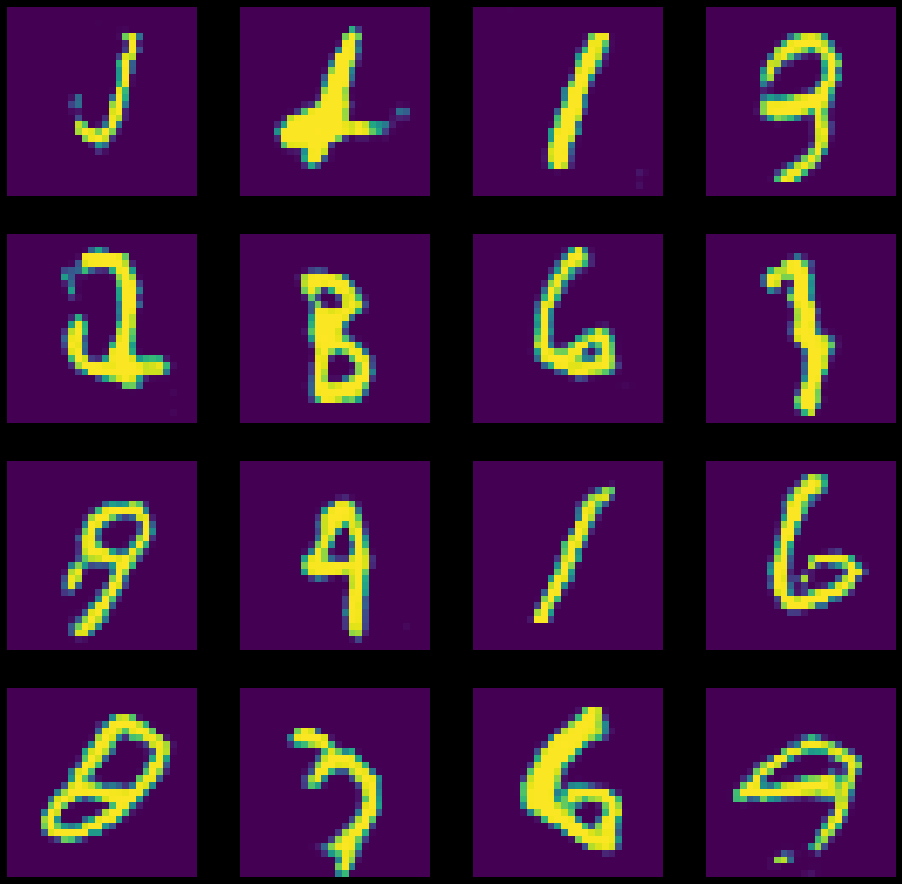

None
2188/2188 [==============================] - 28s 13ms/step - d_loss: 0.6892 - g_loss: 0.6662


In [18]:
g = gan.GAN(g = gen8, d = disc8, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [19]:
name = 'Model_9-Tanh-OneDrop'
model9 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen9 ,disc9 = model.build(model9)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_16 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_42 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_8 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_24 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_40 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

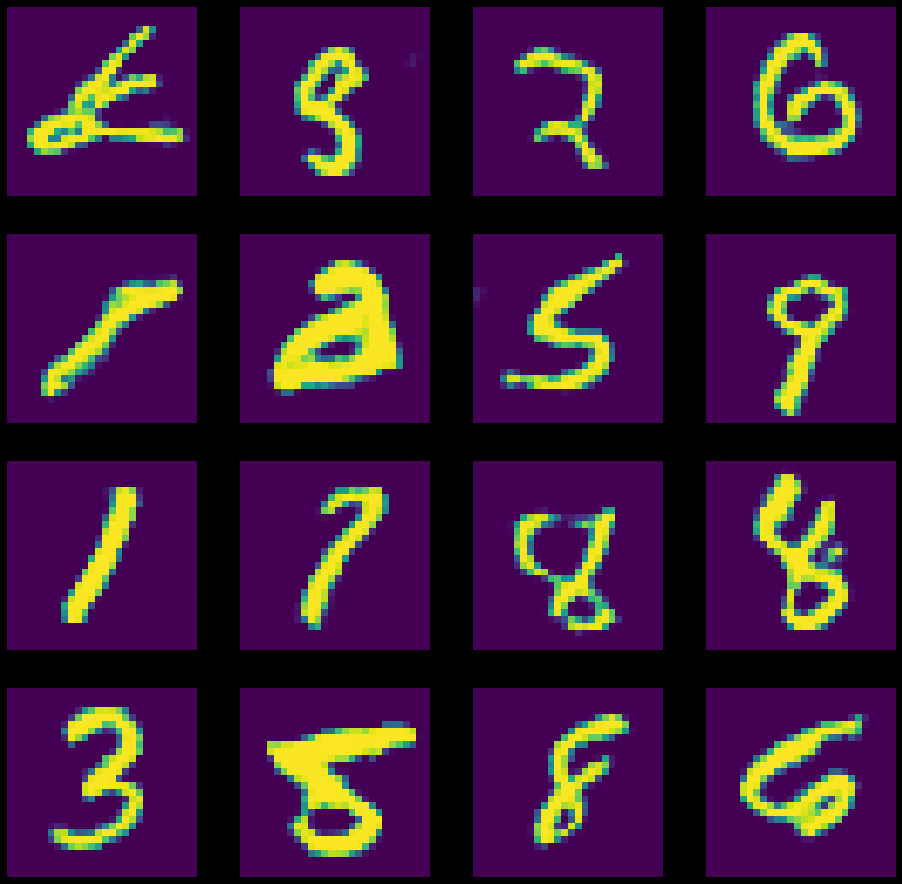

None
2188/2188 [==============================] - 30s 14ms/step - d_loss: 0.6673 - g_loss: 0.7345


In [20]:
g = gan.GAN(g = gen9, d = disc9, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [21]:
name = 'Model_10-Tanh-OneDrop'
model10 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=True
                             )
gen10 ,disc10 = model.build(model10)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_18 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_9 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_45 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

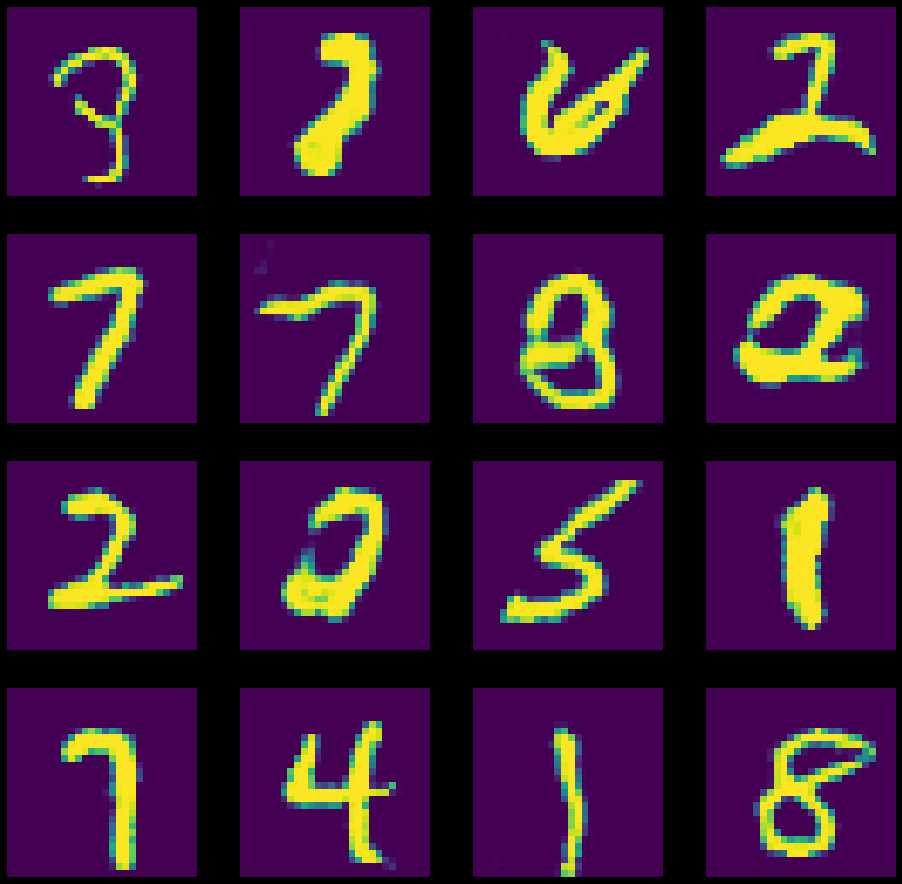

None
2188/2188 [==============================] - 40s 18ms/step - d_loss: 0.6197 - g_loss: 0.8952


In [22]:
g = gan.GAN(g = gen10, d = disc10, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

### Sigmoid Activation

In [23]:
dataset = preprocess.preprocess_Data(x,y, False,res,channel,b_size=batch_size, isTanh=False)

In [24]:
name = 'Model_11-Sig-MultiDrop'
model11 = model.ModelSettings(model_name= name,
                             gen_filter=5,
                             disc_filter=5,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen11 ,disc11 = model.build(model11)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_21 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_20 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_52 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_10 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_30 (Conv2D  (None, 14, 14, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                         

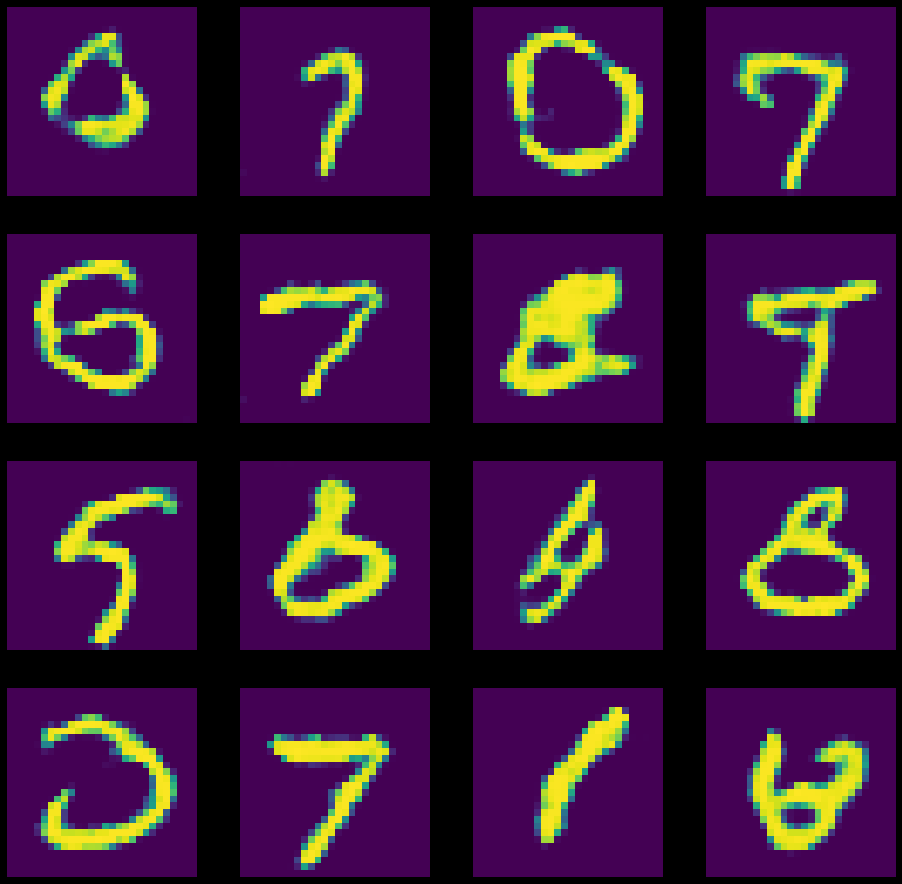

None
2188/2188 [==============================] - 13s 6ms/step - d_loss: 0.6850 - g_loss: 0.6649


In [25]:
g = gan.GAN(g = gen11, d = disc11, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [26]:
name = 'Model_12-Sig-MultiDrop'
model12 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen12, disc12 = model.build(model12)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_22 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_57 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_11 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_33 (Conv2D  (None, 14, 14, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

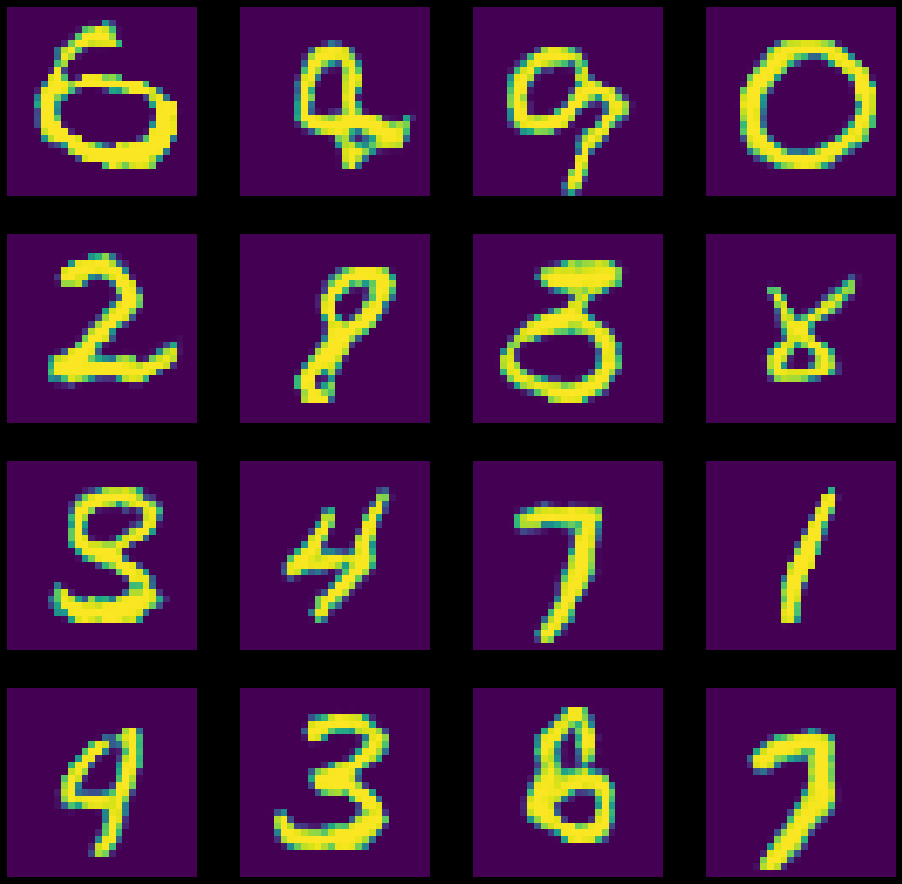

None
2188/2188 [==============================] - 15s 7ms/step - d_loss: 0.6744 - g_loss: 0.6972


In [27]:
g = gan.GAN(g=gen12, d=disc12, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [28]:
name = 'Model_13-Sig-MultiDrop'
model13 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen13, disc13 = model.build(model13)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_24 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_62 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_12 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_36 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_60 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

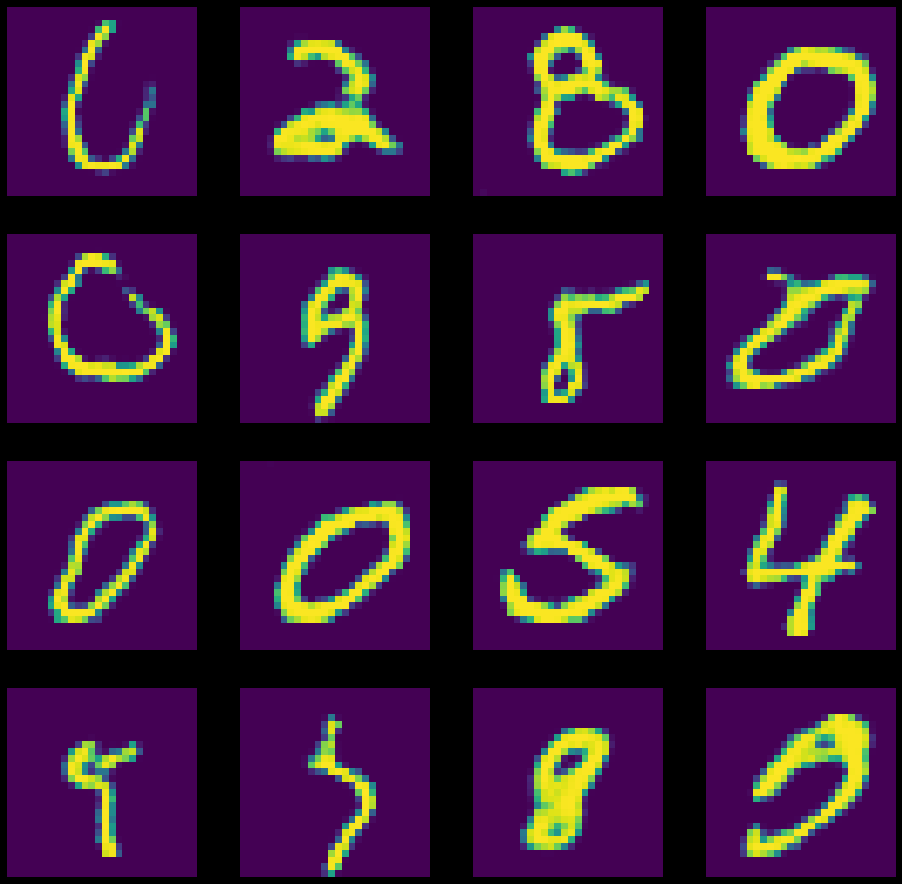

None
2188/2188 [==============================] - 29s 13ms/step - d_loss: 0.6919 - g_loss: 0.6513


In [29]:
g = gan.GAN(g=gen13, d=disc13, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [30]:
name = 'Model_14-Sig-MultiDrop'
model14 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen14, disc14 = model.build(model14)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_27 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_26 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_67 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_13 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_39 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_65 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

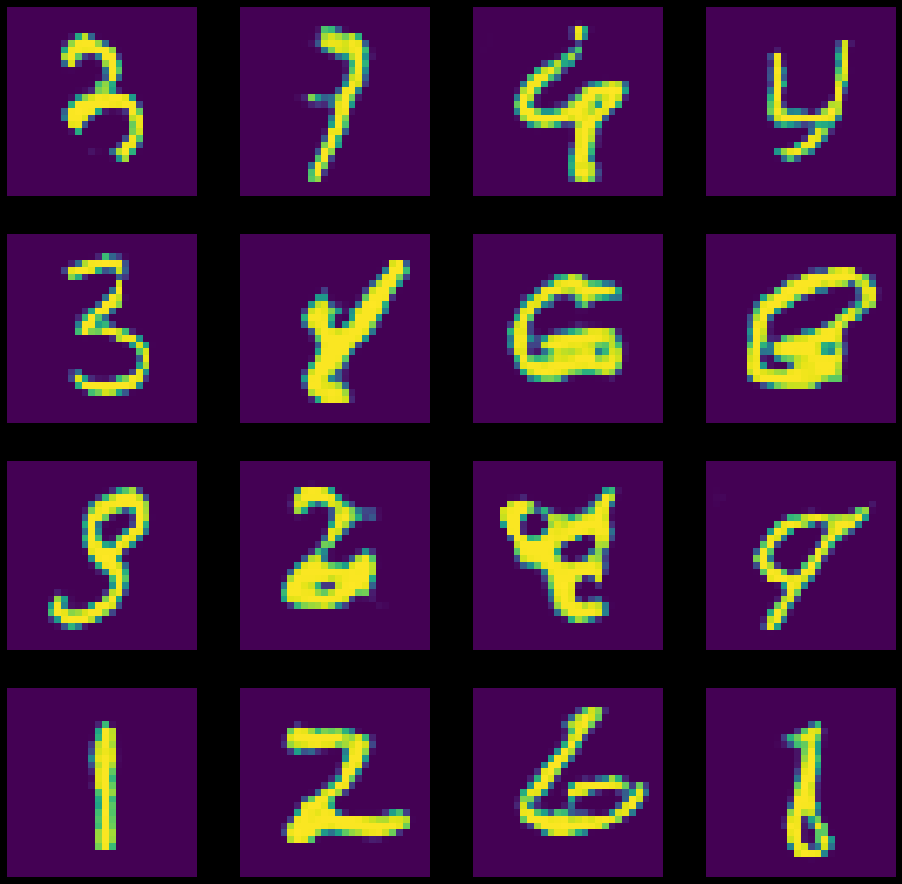

None
2188/2188 [==============================] - 29s 13ms/step - d_loss: 0.6728 - g_loss: 0.7082


In [31]:
g = gan.GAN(g=gen14, d=disc14, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [32]:
name = 'Model_15-Sig-MultiDrop'
model15 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=8,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=True,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen15, disc15 = model.build(model15)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_28 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_72 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_14 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_70 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

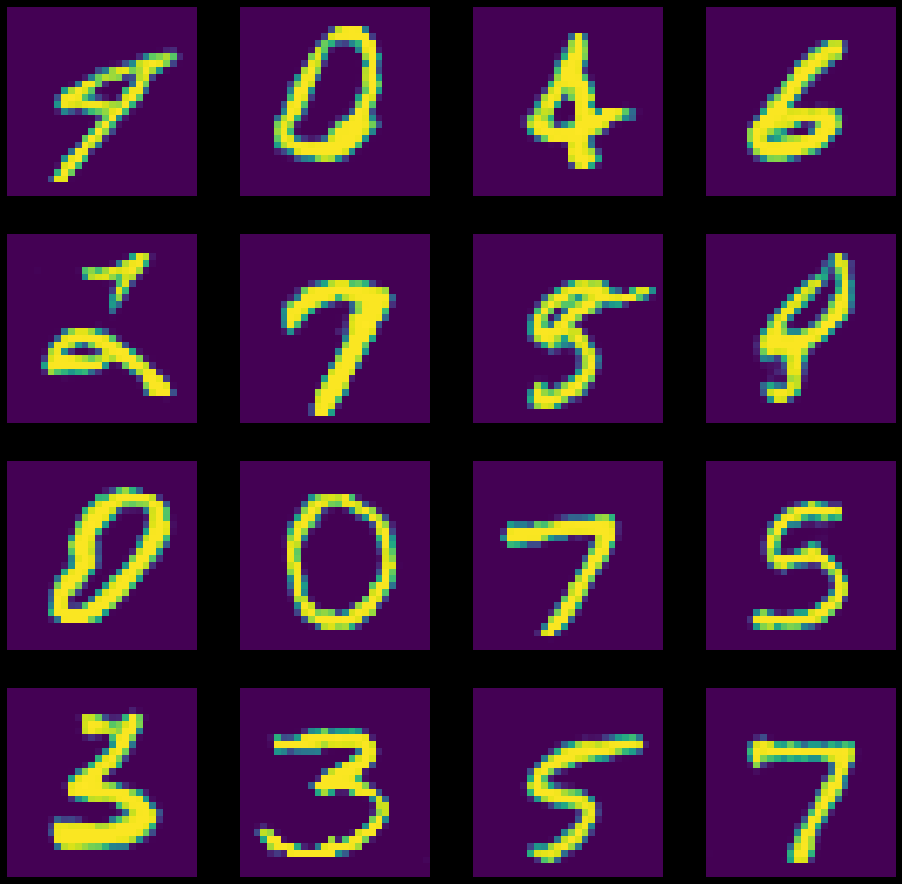

None
2188/2188 [==============================] - 38s 18ms/step - d_loss: 0.6441 - g_loss: 0.8038


In [33]:
g = gan.GAN(g=gen15, d=disc15, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [34]:
name = 'Model_16-Sig-OneDrop'
model16 = model.ModelSettings(model_name=name,
                             gen_filter=5,
                             disc_filter=5,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen16, disc16 = model.build(model16)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_30 (Dense)            (None, 3136)              316736    
                                                                 
 leaky_re_lu_77 (LeakyReLU)  (None, 3136)              0         
                                                                 
 reshape_15 (Reshape)        (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_45 (Conv2D  (None, 14, 14, 32)       32800     
 Transpose)                                                      
                                                                 
 leaky_re_lu_75 (LeakyReLU)  (None, 14, 14, 32)        0         
                                                         

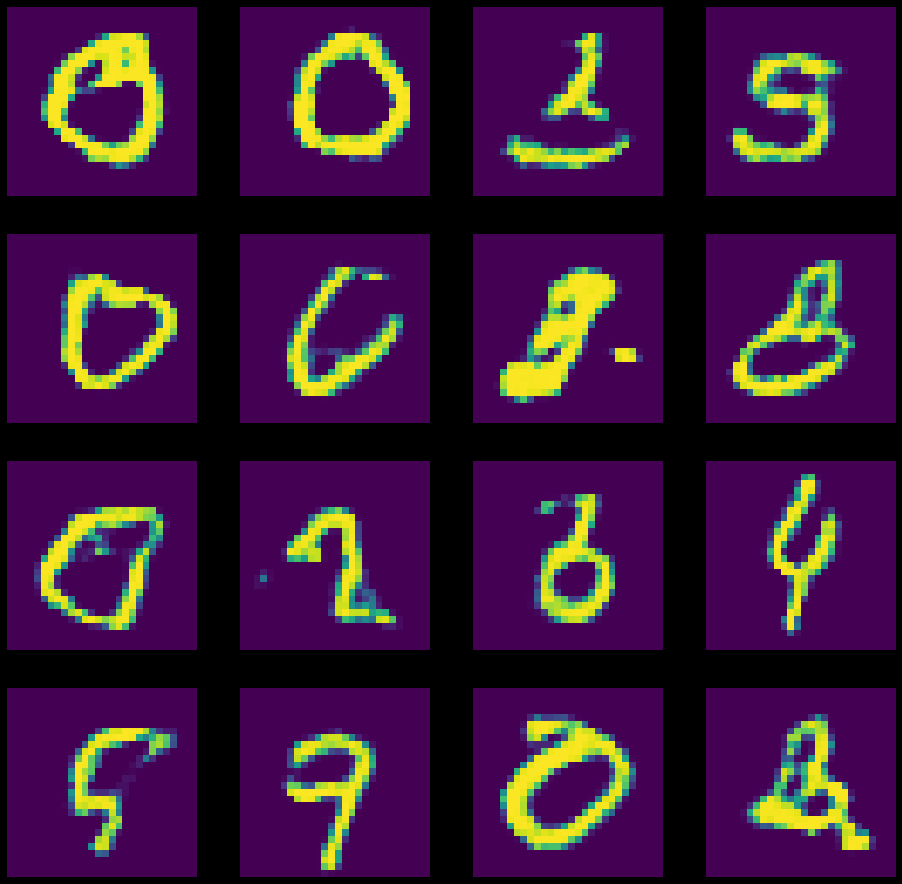

None
2188/2188 [==============================] - 15s 7ms/step - d_loss: 0.6816 - g_loss: 0.6692


In [35]:
g = gan.GAN(g=gen16, d=disc16, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [36]:
name = 'Model_17-Sig-OneDrop'
model17 = model.ModelSettings(model_name=name,
                             gen_filter=6,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen17, disc17 = model.build(model7)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_32 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu_82 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_16 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 conv2d_transpose_48 (Conv2D  (None, 14, 14, 64)       131136    
 Transpose)                                                      
                                                                 
 leaky_re_lu_80 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                         

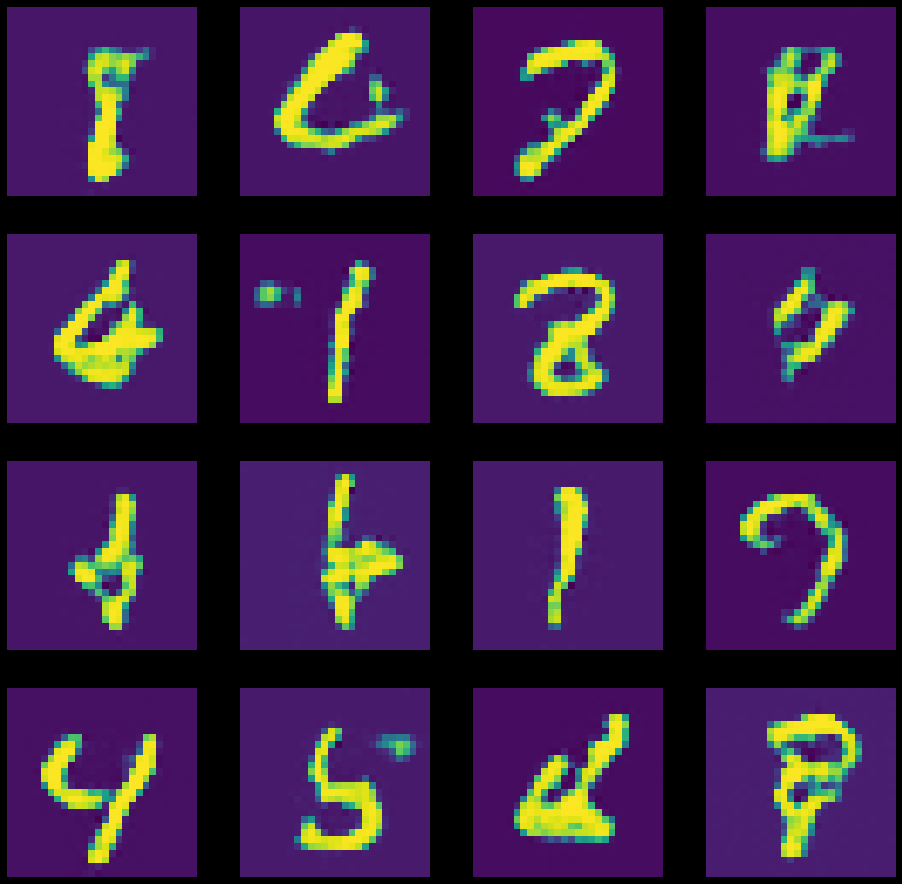

None
2188/2188 [==============================] - 16s 7ms/step - d_loss: 0.5614 - g_loss: 1.0432


In [37]:
g = gan.GAN(g=gen17, d=disc17, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [38]:
name = 'Model_18-Sig-OneDrop'
model18 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=6,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen18, disc18 = model.build(model18)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_34 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_87 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_17 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_51 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_85 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

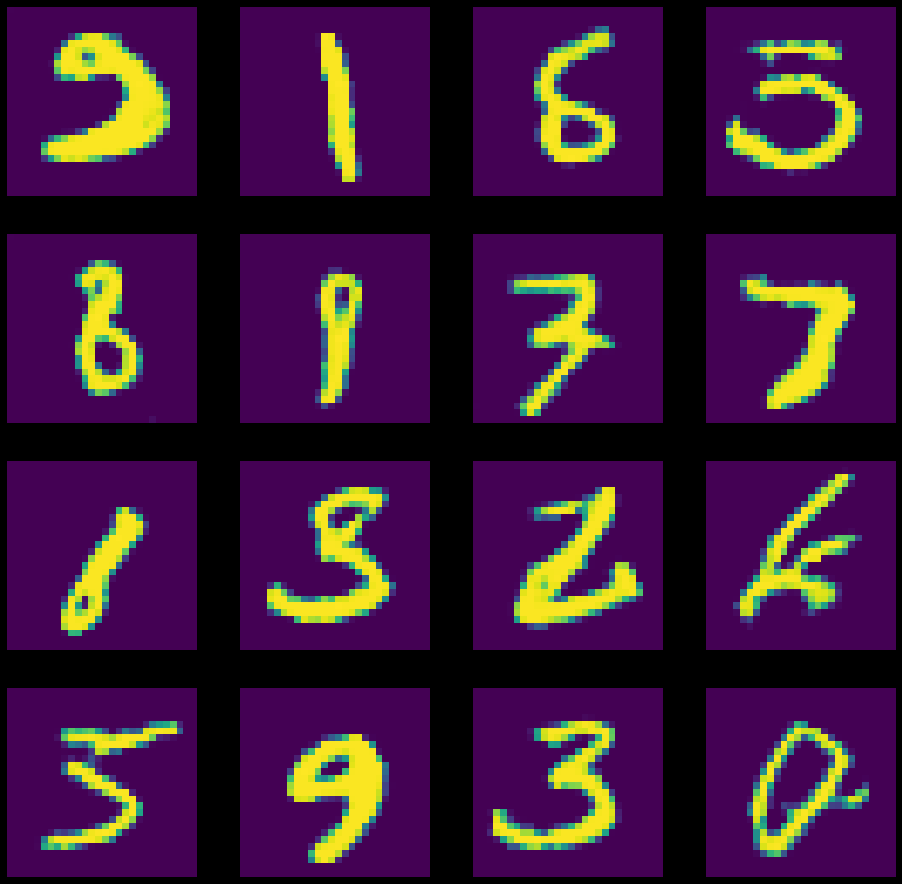

None
2188/2188 [==============================] - 27s 13ms/step - d_loss: 0.6916 - g_loss: 0.6499


In [39]:
g = gan.GAN(g=gen18, d=disc18, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [40]:
name = 'Model_19-Sig-OneDrop'
model19 = model.ModelSettings(model_name=name,
                             gen_filter=7,
                             disc_filter=7,
                             num_conv_layers=2,
                             kernel=4,
                             stride=2,
                             output=channel,
                             img_shape=img_shape,
                             dim=7,
                             latent_dim=latent_dim,
                             filter_mode=2,
                             is_multi_drop=False,
                             is_batchnorm=True,
                             is_tanh=False
                             )
gen19, disc19 = model.build(model19)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_37 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_36 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_92 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_18 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_54 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_90 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

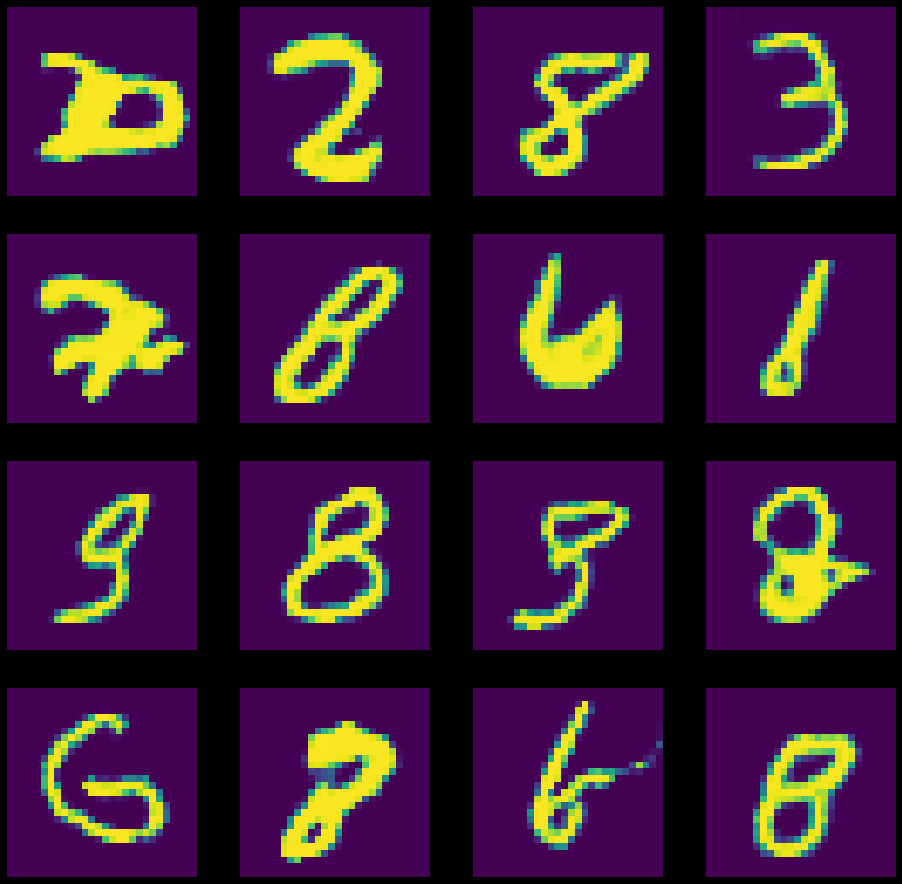

None
2188/2188 [==============================] - 28s 13ms/step - d_loss: 0.6742 - g_loss: 0.7022


In [41]:
g = gan.GAN(g=gen19, d=disc19, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])

In [42]:
name = 'Model_20-Sig-OneDrop'
model20 = model.ModelSettings(model_name=name,
                              gen_filter=7,
                              disc_filter=8,
                              num_conv_layers=2,
                              kernel=4,
                              stride=2,
                              output=channel,
                              img_shape=img_shape,
                              dim=7,
                              latent_dim=latent_dim,
                              filter_mode=2,
                              is_multi_drop=False,
                              is_batchnorm=True,
                              is_tanh=False
                              )
gen20, disc20 = model.build(model20)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_39 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_38 (Dense)            (None, 12544)             1266944   
                                                                 
 leaky_re_lu_97 (LeakyReLU)  (None, 12544)             0         
                                                                 
 reshape_19 (Reshape)        (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_57 (Conv2D  (None, 14, 14, 128)      524416    
 Transpose)                                                      
                                                                 
 leaky_re_lu_95 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                         

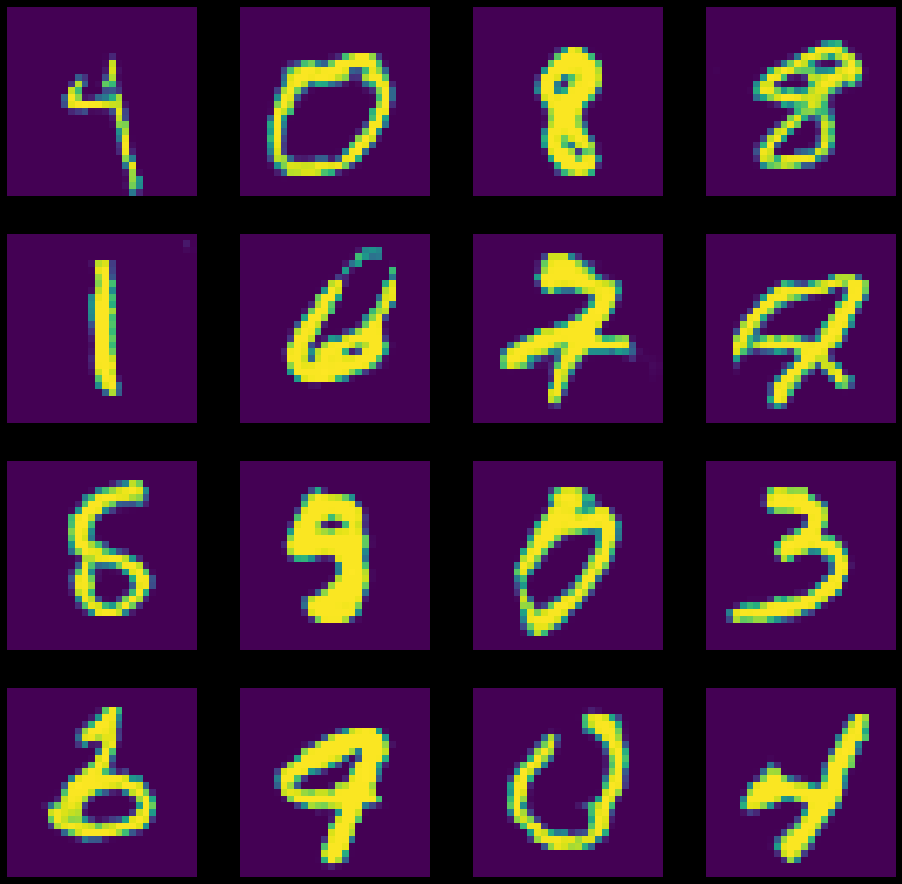

None
2188/2188 [==============================] - 41s 19ms/step - d_loss: 0.6416 - g_loss: 0.8088


In [43]:
g = gan.GAN(g=gen20, d=disc20, b_size=batch_size, l_dim=latent_dim)
g.compile(d_optimizer=d_optimizer, g_optimizer=g_optimizer)
g.fit(dataset, epochs=epochs, callbacks = [gan.GANCallback(num_img=n_images,iFreq=image_freq, seed=s, loc=image_dir, name=name)])